# LSTM Model


**We will be applying a LSTM model over our training data and evaluating its classification accuracy.**


**Load Libraries**

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM, Dropout
from tensorflow.keras.callbacks import Callback, ReduceLROnPlateau, EarlyStopping
import pickle
import matplotlib.pyplot as plt
import os
import tempfile


**Load Data**


In [7]:

with open("input/train.pkl", "rb") as f:
    X_train, X_test, y_train, y_test = pickle.load(f)

with open("input/matrix.pkl", "rb") as f:
    embedding_matrix, embedding_dimensions, vocab_length = pickle.load(f)
    

 

**Set Dynamic Learning Rate. We'll reduce learning rate if validation loss has stopped improving.**


In [5]:

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-6, verbose=1)


**We'll stop training once validation loss has stopped improving.**


In [6]:

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, mode='auto')



**Create LTSM model and fit model over training data**


In [8]:
# Create LSTM Model 
lstm_model = Sequential()
lstm_model.add(Embedding(vocab_length, embedding_dimensions, trainable= False, weights=[embedding_matrix]))
lstm_model.add(LSTM(128, return_sequences=False))
lstm_model.add(Dense(1, activation='sigmoid'))
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(lstm_model.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         1000000   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 1,117,377
Trainable params: 117,377
Non-trainable params: 1,000,000
_________________________________________________________________
None


In [9]:
# Fit Model over Data
num_epochs = 20
batch_size = 256
model = lstm_model.fit(X_train,y_train,validation_data =(X_test,y_test), epochs=num_epochs, batch_size=batch_size, callbacks=([reduce_lr,early_stopping]) )


Train on 31428 samples, validate on 13470 samples
Epoch 1/20
31428/31428 [==============================] - 224s 7ms/step - loss: 0.2828 - acc: 0.8880 - val_loss: 0.1791 - val_acc: 0.9303
Epoch 2/20
31428/31428 [==============================] - 211s 7ms/step - loss: 0.2056 - acc: 0.9145 - val_loss: 0.1779 - val_acc: 0.9310
Epoch 3/20
31428/31428 [==============================] - 214s 7ms/step - loss: 0.1516 - acc: 0.9443 - val_loss: 0.1336 - val_acc: 0.9480
Epoch 4/20
31428/31428 [==============================] - 209s 7ms/step - loss: 0.2272 - acc: 0.9004 - val_loss: 0.2067 - val_acc: 0.9180
Epoch 5/20
31428/31428 [==============================] - 205s 7ms/step - loss: 0.1532 - acc: 0.9432 - val_loss: 0.1353 - val_acc: 0.9409
Epoch 6/20
31428/31428 [==============================] - 204s 6ms/step - loss: 0.1931 - acc: 0.9242 - val_loss: 0.1200 - val_acc: 0.9571
Epoch 7/20
31428/31428 [==============================] - 215s 7ms/step - loss: 0.1221 - acc: 0.9574 - val_loss: 0.1047 - 

**Evaluate Model Accuracy**


**Plot Accuracy & Loss Graphs**


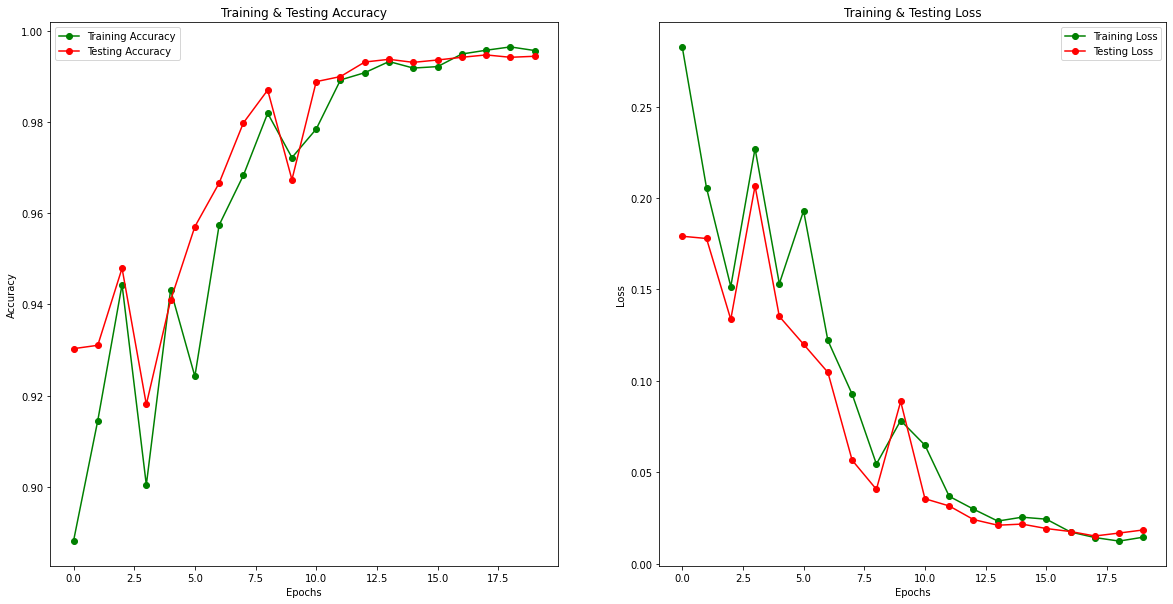

In [13]:

epochs = [i for i in range(num_epochs)]
fig, ax = plt.subplots(1,2)
training_accuracy = model.history['acc']
training_loss = model.history['loss']
validation_accuracy = model.history['val_acc']
validation_loss = model.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs, training_accuracy, 'go-', label = 'Training Accuracy')
ax[0].plot(epochs, validation_accuracy, 'ro-', label = 'Testing Accuracy')
ax[0].set_title('Training & Testing Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")


ax[1].plot(epochs, training_loss, 'go-', label = 'Training Loss')
ax[1].plot(epochs, validation_loss, 'ro-', label = 'Testing Loss')
ax[1].set_title('Training & Testing Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()


**Output Model's Accuracy Results**


**Train & Test Accuracy Results**

In [14]:
train_results = lstm_model.evaluate(X_train,y_train, verbose=0, batch_size=batch_size)
test_results = lstm_model.evaluate(X_test,y_test, verbose=0, batch_size=batch_size)
print("Train Accuracy: {}".format(train_results[1]*100))
print("Test Accuracy: {}".format(test_results[1]*100))


Train Accuracy: 99.49089983605968
Test Accuracy: 99.4506310257278


**Model's Absolute Accuracy**


In [15]:

predictions = lstm_model.predict_classes(X_test)
print("Accuracy: {}".format(round(accuracy_score(y_test,predictions)*100,2)))


Accuracy: 99.45


**Confusion Matrix**


In [16]:
conf_matrix = confusion_matrix(y_test,predictions)
print("Confusion Matrix: \n", conf_matrix)
print("Classification Report: \n", classification_report(y_test,predictions))


Confusion Matrix: 
 [[7005   64]
 [  10 6391]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      7069
           1       0.99      1.00      0.99      6401

   micro avg       0.99      0.99      0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



**Save Model**


In [42]:
MODEL_DIR = "./saved_models/LSTM/LSTM_Model.hdf5"
print(MODEL_DIR)
version = 1
export_path = os.path.join(MODEL_DIR,str(version)) 
print('export_path = {}\n'.format(export_path))

tf.keras.models.save_model(lstm_model,MODEL_DIR,overwrite=True)


./saved_models/LSTM/LSTM_Model.hdf5
export_path = ./saved_models/LSTM/LSTM_Model.hdf5\1

